# Project: Movies Recommendation based on dataset TMDB - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The Dataset Tmdb.csv includes film discreption since 1960. Each row contains:   
imdb_id     
popularity                 
budget                     
revenue                    
original_title             
cast                     
homepage                
director                  
tagline                 
keywords                
overview                   
runtime                    
genres                    
production_companies    
release_date               
vote_count                 
vote_average               
release_year               
budget_adj                 
revenue_adj  

The total number of movies in the dataset are 10866 movies. some lack data but not so important in the analysis.

In [1]:
# importing libiraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
df.loc[df['id'] == df[df.duplicated()]['id'].values[0]]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


The dataset contains only one duplicate. we can use the following code.

In [9]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [10]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What are the top 10 best rated movies? )

Demographic Filtering: I used the equation that calculate the likability of recommending a certain movie based on score that come from a weighted ranking calculated by the following equation.
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-

where,

    v is the number of votes for the movie;
    R is the average rating of the movie; And
    C is the shrink term as a function of the vote count
weighted rating = (v/(v+C) * R))

In [11]:
C= df['vote_count'].quantile(0.1)
C

12.0

In [12]:
q_movies = df.loc[df['vote_count'] >= C]

In [13]:
q_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9890 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9890 non-null   int64  
 1   imdb_id               9884 non-null   object 
 2   popularity            9890 non-null   float64
 3   budget                9890 non-null   int64  
 4   revenue               9890 non-null   int64  
 5   original_title        9890 non-null   object 
 6   cast                  9829 non-null   object 
 7   homepage              2756 non-null   object 
 8   director              9860 non-null   object 
 9   tagline               7538 non-null   object 
 10  keywords              8676 non-null   object 
 11  overview              9886 non-null   object 
 12  runtime               9890 non-null   int64  
 13  genres                9874 non-null   object 
 14  production_companies  9082 non-null   object 
 15  release_date        

In [14]:
def weighted_rating(x, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+C) * R)

In [15]:
q_movies.iloc[np.random.randint(q_movies.shape[0])]

id                                                                   9400
imdb_id                                                         tt0117603
popularity                                                       0.693264
budget                                                            9000000
revenue                                                          41590886
original_title                                                Set  It Off
cast                    Jada Pinkett Smith|Queen Latifah|Vivica A. Fox...
homepage                  http://www.newline.com/properties/setitoff.html
director                                                     F. Gary Gray
tagline                 It's about crime. It's about payback. It's abo...
keywords                single parent|bank robber|last chance|los angeles
overview                Four Black women, all of whom have suffered fo...
runtime                                                               118
genres                                

In [16]:
#try ID of random movie to see the score
id = np.random.randint(q_movies.shape[0])
print('id: {0}, weigted rating: {1}, adjusted weighted rating {2}'.format(id, q_movies.iloc[id]['vote_average'], weighted_rating(q_movies.iloc[id])))

id: 5871, weigted rating: 5.1, adjusted weighted rating 2.55


In [17]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
df['score'] = df.apply(weighted_rating, axis=1)

C:\Users\muham\AppData\Local\Temp/ipykernel_12464/2972981863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies['score'] = q_movies.apply(weighted_rating, axis=1)


now after calculating the score we can sort the score of each movie 

In [18]:
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 5 movies
q_movies[['original_title', 'vote_count', 'vote_average', 'score', 'genres']].head()

,original_title,vote_count,vote_average,score,genres
4178,The Shawshank Redemption,5754,8.4,8.382518,Drama|Crime
7269,The Godfather,3970,8.3,8.274987,Drama|Crime
650,Whiplash,2372,8.2,8.158725,Drama|Music
2875,The Dark Knight,8432,8.1,8.088489,Drama|Action|Crime|Thriller
2409,Fight Club,5923,8.1,8.083623,Drama


Text(0.5, 1.0, 'Best Rated Movies')

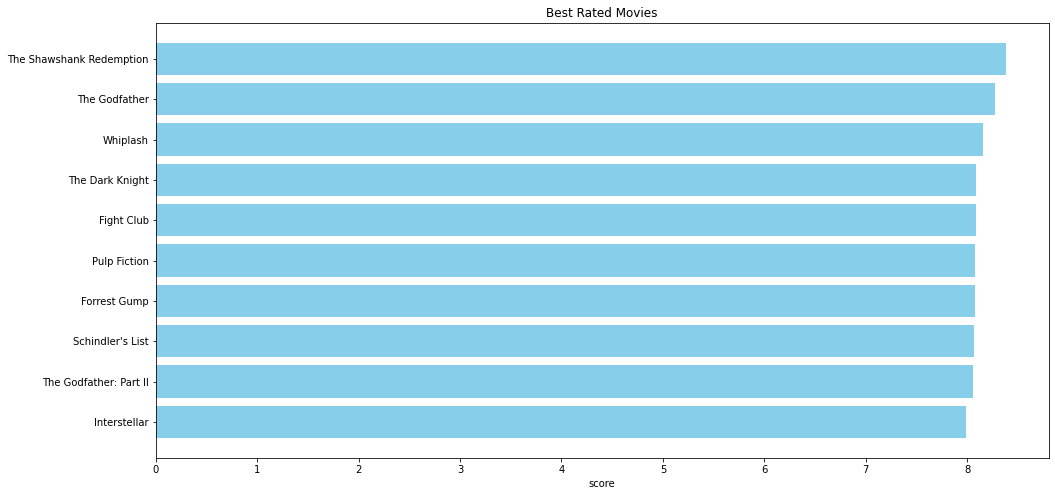

In [19]:
#we can now plot the likability to recommend certain movie 
best= q_movies.sort_values('score', ascending=False)
plt.figure(figsize=(16,8))

plt.barh(best['original_title'].head(10),best['score'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("score")
plt.title("Best Rated Movies")

The plot shows that The Shawshank Redemption has the highest score of all time. The original Imdb on the website confirm most of the result in this chart. 

Text(0.5, 1.0, 'Top popular Movies')

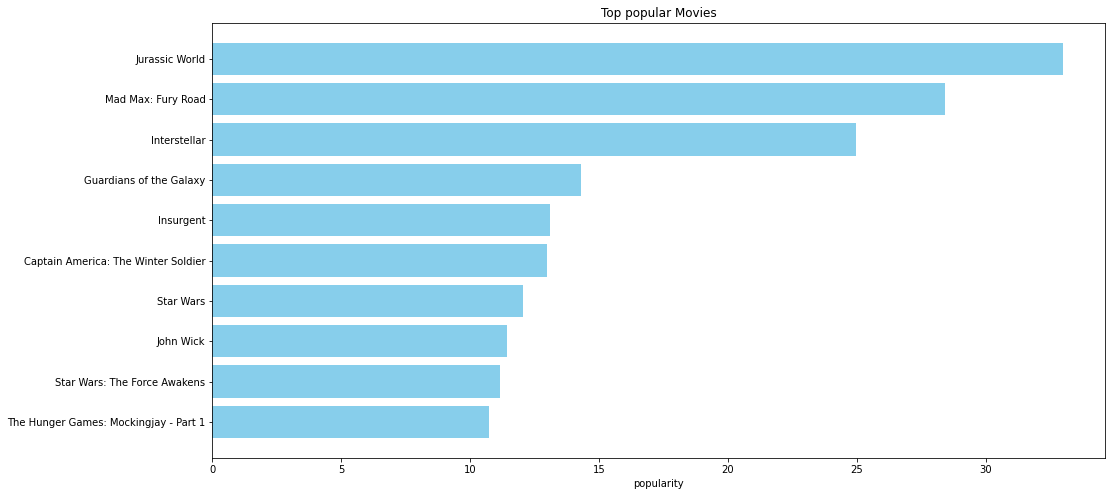

In [20]:
#we can plot the top popular movies and compare with the best rated one
pop= q_movies.sort_values('popularity', ascending=False)
plt.figure(figsize=(16,8))

plt.barh(pop['original_title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("popularity")
plt.title("Top popular Movies")

In [21]:
set(best['original_title'].head(10)).intersection(set(pop['original_title'].head(10)))

{'Interstellar'}

We can see that the only movie that has both highest popularity and best rating is INTERSTELLAR.

In [22]:
# calculating correlation among features to find the most features that affect the score
score_corr = q_movies.corr()['score'].sort_values(ascending=False)
score_corr

score           1.000000
vote_average    0.693457
vote_count      0.494081
popularity      0.482682
revenue_adj     0.421465
revenue         0.409788
budget_adj      0.400132
budget          0.386669
runtime         0.184650
release_year    0.015767
id             -0.097718
Name: score, dtype: float64

In [23]:
#see the full data of one of the top 10 movies
q_movies.loc[(q_movies["original_title"] =="The Dark Knight")]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score
2875,155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,http://thedarkknight.warnerbros.com/dvdsite/,Christopher Nolan,Why So Serious?,...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09,8.088489


Text(0, 0.5, 'Vote Average')

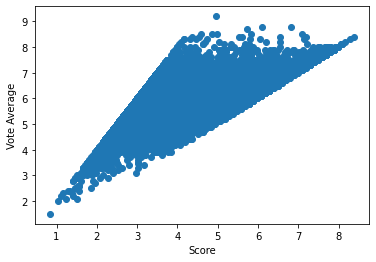

In [24]:
#plotting the feature that is most correlated with the score
plt.scatter(q_movies["score"], q_movies["vote_average"])
plt.xlabel("Score")
plt.ylabel("Vote Average")

The graph shows the correlation between Vote Average and score. the scattering around the line shows that Vote Average is highly correlated with the score.

Text(0, 0.5, 'Revenue')

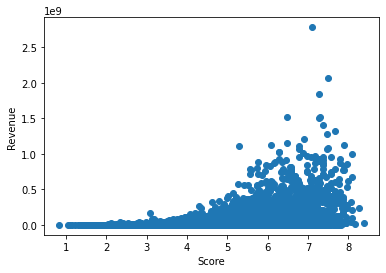

In [25]:
#plotting the 5th values that affect the score
plt.scatter(q_movies["score"], q_movies["revenue"])
plt.xlabel("Score")
plt.ylabel("Revenue")

The 5th correlated 'Revenue' with score shows that it's not correlated with the score. this is evident that Revenue doesn't affect the score that much.

### Research Question 2  (Identify best rated 6 movies in each genres and the top 6 popular genres)

There are only 23 movies that have missing genres tags. I chose to set 'empty' string at these 23 movies. so that no error could be found.

In [26]:
q_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9890 entries, 4178 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9890 non-null   int64  
 1   imdb_id               9884 non-null   object 
 2   popularity            9890 non-null   float64
 3   budget                9890 non-null   int64  
 4   revenue               9890 non-null   int64  
 5   original_title        9890 non-null   object 
 6   cast                  9829 non-null   object 
 7   homepage              2756 non-null   object 
 8   director              9860 non-null   object 
 9   tagline               7538 non-null   object 
 10  keywords              8676 non-null   object 
 11  overview              9886 non-null   object 
 12  runtime               9890 non-null   int64  
 13  genres                9874 non-null   object 
 14  production_companies  9082 non-null   object 
 15  release_date     

In [27]:
q_movies['genres'].isnull().sum()

16

In [28]:
q_movies[q_movies['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.0,0.0,6.113043
5830,282848,tt2986512,0.248944,0,0,Doctor Who: The Time of the Doctor,Matt Smith|Jenna Coleman,NaN,James Payne,A change is going to come...,...,60,NaN,NaN,12/25/13,26,8.5,2013,0.0,0.0,5.815789
8234,56804,tt0114844,0.028874,0,0,Viaggi di nozze,Carlo Verdone|Claudia Gerini|Veronica Pivetti|...,NaN,Carlo Verdone,NaN,...,103,NaN,NaN,12/15/95,44,6.7,1995,0.0,0.0,5.264286
5934,200204,tt2808968,0.067433,0,0,Prada: Candy,Peter Gadiot|Rodolphe Pauly|LÃ©a Seydoux,NaN,Wes Anderson|Roman Coppola,short,...,3,NaN,NaN,3/25/13,27,6.9,2013,0.0,0.0,4.776923
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,220,NaN,BBC,7/27/12,12,8.3,2012,0.0,0.0,4.150000
6530,168891,tt0818519,0.092724,0,0,Saw Rebirth,Whit Anderson|Stan Kirsch|Jeff Shuter|George W...,NaN,Jeff Shuter|Daniel Viney,Somewhere... Somehow... Something went wrong...,...,6,NaN,NaN,10/24/05,24,5.9,2005,0.0,0.0,3.933333
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0,3.881818
4890,126909,tt2219564,0.083202,0,0,Cousin Ben Troop Screening,Jason Schwartzman,http://www.funnyordie.com/videos/fc132ce8b2/co...,Wes Anderson,NaN,...,2,NaN,NaN,1/1/12,14,7.0,2012,0.0,0.0,3.769231
8614,65595,tt0117880,0.273934,0,0,T2 3-D: Battle Across Time,Arnold Schwarzenegger|Linda Hamilton|Edward Fu...,NaN,James Cameron,NaN,...,12,NaN,NaN,1/1/96,14,6.7,1996,0.0,0.0,3.607692
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,110,NaN,NaN,2/2/01,12,7.2,2001,0.0,0.0,3.600000


In [29]:
q_movies['genres'].fillna('None', inplace=True)

checking after filling data if any genres have missing data.

In [30]:
q_movies['genres'].isnull().sum()
q_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9890 entries, 4178 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9890 non-null   int64  
 1   imdb_id               9884 non-null   object 
 2   popularity            9890 non-null   float64
 3   budget                9890 non-null   int64  
 4   revenue               9890 non-null   int64  
 5   original_title        9890 non-null   object 
 6   cast                  9829 non-null   object 
 7   homepage              2756 non-null   object 
 8   director              9860 non-null   object 
 9   tagline               7538 non-null   object 
 10  keywords              8676 non-null   object 
 11  overview              9886 non-null   object 
 12  runtime               9890 non-null   int64  
 13  genres                9890 non-null   object 
 14  production_companies  9082 non-null   object 
 15  release_date     

Now implementing the code that rate the top 6 movies in each genres

In [31]:
#here we get the list of unique genres
unique_genres = set()

def genres_split(df, unique_genres=unique_genres):
    row_genres = df['genres'].split(sep='|')
    unique_genres.update(set(row_genres))

q_movies.apply(genres_split, axis=1)
unique_genres = list(unique_genres)
unique_genres

['Crime',
 'Documentary',
 'Fantasy',
 'Science Fiction',
 'History',
 'Comedy',
 'Action',
 'None',
 'Thriller',
 'Horror',
 'War',
 'Western',
 'Foreign',
 'Family',
 'TV Movie',
 'Adventure',
 'Drama',
 'Animation',
 'Romance',
 'Music',
 'Mystery']

In [32]:
q_movies[unique_genres] = 0


In [33]:
#here we use the function add_genres to apply 0,1 to each column of genres if the source contain one or more
def add_genres(df,unique_genres=unique_genres):
    df[unique_genres] = [1 if x in df['genres'].split(sep='|') else 0 for x in unique_genres]
    return df[unique_genres]
q_movies[unique_genres] = q_movies.apply(add_genres, axis=1)
q_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Western,Foreign,Family,TV Movie,Adventure,Drama,Animation,Romance,Music,Mystery
4178,278,tt0111161,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,NaN,Frank Darabont,Fear can hold you prisoner. Hope can set you f...,...,0,0,0,0,0,1,0,0,0,0
7269,238,tt0068646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,0,0,0,0,0,1,0,0,0,0
650,244786,tt2582802,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,http://sonyclassics.com/whiplash/,Damien Chazelle,The road to greatness can take you to the edge.,...,0,0,0,0,0,1,0,0,1,0
2875,155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,http://thedarkknight.warnerbros.com/dvdsite/,Christopher Nolan,Why So Serious?,...,0,0,0,0,0,1,0,0,0,0
2409,550,tt0137523,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,http://www.foxmovies.com/movies/fight-club,David Fincher,How much can you know about yourself if you've...,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,83896,tt1844770,0.159707,0,0,Sand Sharks,Corin Nemec|Brooke Hogan|Vanessa Evigan|Eric S...,NaN,Mark Atkins,Just When You Thought You Were Safe Out of the...,...,0,0,0,0,0,0,0,0,0,0
7235,10838,tt0367677,0.209701,0,0,Dracula 3000,Casper Van Dien|Erika Eleniak|Coolio|Grant Swa...,NaN,Darrell James Roodt,"In space, the sun never rises.",...,0,0,0,0,0,0,0,0,0,0
4859,116977,tt0249516,0.111351,65000000,73706,Foodfight!,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...,http://www.thresholdanimationstudios.com/video...,Lawrence Kasanoff,When good food... goes bad!,...,0,0,1,0,0,0,1,0,0,0
4882,120846,tt2071491,0.079281,0,0,Jurassic Shark,Emanuelle Carriere|Christine Emes|Celine Filio...,NaN,Brett Kelly,Dinosaur from the deep,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#list top 6 best rated genres
import operator

genres_score = {}
for col in unique_genres:
  genres_score[col] = q_movies.loc[q_movies[col] == 1]['score'].mean()
top6_genre_df = pd.DataFrame(list(genres_score.items()),columns = ['genre','average_score'])
top6_genre_df = top6_genre_df.sort_values(by='average_score',ascending=False)[:6]
top6_genre_df


,genre,average_score
17,Animation,5.224182
10,War,5.133359
4,History,5.043671
0,Crime,5.030205
15,Adventure,5.026870
19,Music,4.892194


In [35]:
"{:.2f}".format(1.234)

'1.23'

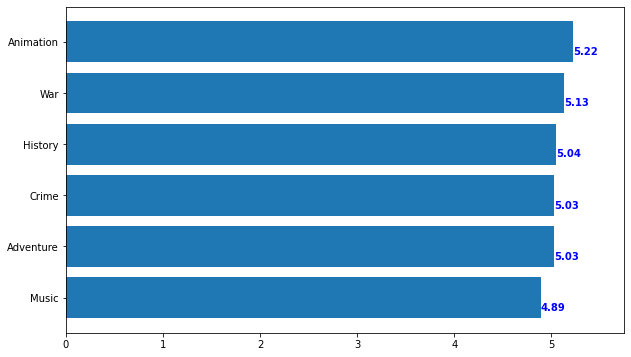

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

plt.barh(top6_genre_df['genre'], top6_genre_df['average_score'])
plt.gca().invert_yaxis()
plt.margins(x=.1)

for i, v in enumerate(top6_genre_df['average_score']):
    ax.text(v, i + .25, "{:.2f}".format(v), color='blue', fontweight='bold')

plt.show()




The graph shows the top 6 genres of all time. In the 1st place come Animation followed by War. This graph means that Animation had the highest rate of all time.

### Research Question 3  (Predict movies revenue)?

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [38]:
df['genres'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['keywords'].fillna('Unknown', inplace=True)
df['production_companies'].fillna('Unknown', inplace=True)
df['homepage'].fillna('Unknown', inplace=True)



In [39]:
#here we get the list of unique genres
col = 'production_companies'
unique_values = set()

def split_adjusted(df, unique_values=unique_values, col=col):
    row_keywords = df[col].split(sep='|')
    unique_values.update(set(row_keywords))

df.apply(split_adjusted, axis=1)
unique_values = list(unique_values)
len(unique_values)

7880

In [40]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

In [41]:
df['release_month'] = df['release_date'].dt.month

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6.486006,6
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,7.086251,5
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,6.269663,3
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,7.483032,12
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,7.270395,4


In [42]:
df[unique_genres] = 0
df[unique_genres] = df.apply(add_genres, axis=1)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Western,Foreign,Family,TV Movie,Adventure,Drama,Animation,Romance,Music,Mystery
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,1,0,0,0,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,1,0,0,0,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0,0,0,0,1,0,0,0,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0,0,0,0,1,0,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0,0,0,0,0,0,0,0,0,0


In [45]:
director_popularity = df.groupby('director')['id'].count() / df.groupby('director')['id'].count().max()
director_popularity

director
 FrÃ©dÃ©ric Jardin            0.022222
A. Todd Smith                 0.022222
A.R. Murugadoss               0.022222
Aaron Aites                   0.022222
Aaron Blaise|Robert Walker    0.022222
                                ...   
Ã‡aÄŸan Irmak                 0.022222
Ã‰mile Gaudreault             0.022222
Ã‰ric Besnard                 0.022222
Ã‰tienne Chatiliez            0.066667
Ã€lex Pastor|David Pastor     0.022222
Name: id, Length: 5067, dtype: float64

In [46]:
# checking if there are movies that has multiple director
c = 0
multiple_director = []
for i in director_popularity.index:
    if i.find('|') != -1:
        multiple_director.append(i)
        c += 1
df[df['director'].isin(multiple_director)].groupby('director')['id'].count().sort_values(ascending=False)

director
Bobby Farrelly|Peter Farrelly               10
Jason Friedberg|Aaron Seltzer                7
Jules Bass|Arthur Rankin, Jr.                6
Don Bluth|Gary Goldman                       6
Joe Berlinger|Bruce Sinofsky                 4
                                            ..
Graham Annable|Anthony Stacchi               1
Grant Harvey|Steven Hoban|Brett Sullivan     1
Greg Olliver|Wes Orshoski                    1
Gregg Godfrey|Jeremy Rawle                   1
Ã€lex Pastor|David Pastor                    1
Name: id, Length: 646, dtype: int64

In [47]:
df = df.merge(right= director_popularity, how='left', left_on='director', right_index=True, right_on='director')
df.head(5)

,id_x,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Foreign,Family,TV Movie,Adventure,Drama,Animation,Romance,Music,Mystery,id_y
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,1,0,0,0,0,0,0.044444
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,1,0,0,0,0,0,0.177778
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0,0,0,1,0,0,0,0,0,0.111111
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0,0,0,1,0,0,0,0,0,0.111111
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0,0,0,0,0,0,0,0,0,0.177778


In [51]:
df.rename(columns={'id_x': 'id', 'id_y': 'director_popularity'}, inplace=True)

In [52]:
df['director_popularity'].fillna(0, inplace=True)

In [54]:
whole_data = df.drop(columns=['id', 'imdb_id', 'original_title', 'cast', 'tagline', 'keywords', 'overview', 'homepage', 'director',
                'genres', 'production_companies', 'release_date','vote_count', 'vote_average','budget_adj',
                'revenue_adj']).copy()
whole_data.head()

,popularity,budget,revenue,runtime,release_year,score,release_month,Crime,Documentary,Fantasy,...,Foreign,Family,TV Movie,Adventure,Drama,Animation,Romance,Music,Mystery,director_popularity
0,32.985763,150000000,1513528810,124,2015,6.486006,6,0,0,0,...,0,0,0,1,0,0,0,0,0,0.044444
1,28.419936,150000000,378436354,120,2015,7.086251,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0.177778
2,13.112507,110000000,295238201,119,2015,6.269663,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0.111111
3,11.173104,200000000,2068178225,136,2015,7.483032,12,0,0,1,...,0,0,0,1,0,0,0,0,0,0.111111
4,9.335014,190000000,1506249360,137,2015,7.270395,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0.177778


In [55]:
whole_data.columns

Index(['popularity', 'budget', 'revenue', 'runtime', 'release_year', 'score',
       'release_month', 'Crime', 'Documentary', 'Fantasy', 'Science Fiction',
       'History', 'Comedy', 'Action', 'None', 'Thriller', 'Horror', 'War',
       'Western', 'Foreign', 'Family', 'TV Movie', 'Adventure', 'Drama',
       'Animation', 'Romance', 'Music', 'Mystery', 'director_popularity'],
      dtype='object')

In [56]:
target = whole_data[['score']]
whole_data = whole_data.drop(["score"],axis=1)

In [57]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   popularity           10865 non-null  float64
 1   budget               10865 non-null  int64  
 2   revenue              10865 non-null  int64  
 3   runtime              10865 non-null  int64  
 4   release_year         10865 non-null  int64  
 5   release_month        10865 non-null  int64  
 6   Crime                10865 non-null  int64  
 7   Documentary          10865 non-null  int64  
 8   Fantasy              10865 non-null  int64  
 9   Science Fiction      10865 non-null  int64  
 10  History              10865 non-null  int64  
 11  Comedy               10865 non-null  int64  
 12  Action               10865 non-null  int64  
 13  None                 10865 non-null  int64  
 14  Thriller             10865 non-null  int64  
 15  Horror               10865 non-null 

In [58]:
whole_data.isna().sum()

popularity             0
budget                 0
revenue                0
runtime                0
release_year           0
release_month          0
Crime                  0
Documentary            0
Fantasy                0
Science Fiction        0
History                0
Comedy                 0
Action                 0
None                   0
Thriller               0
Horror                 0
War                    0
Western                0
Foreign                0
Family                 0
TV Movie               0
Adventure              0
Drama                  0
Animation              0
Romance                0
Music                  0
Mystery                0
director_popularity    0
dtype: int64

Let's use first a baseline to use for comparison with models that I am going to use

In [59]:
from sklearn.linear_model import LinearRegression
# get the locations
from sklearn.model_selection import train_test_split 
xtrain, xval, ytrain, yval = train_test_split(whole_data, target, test_size=0.2, random_state=42)

In [60]:
avg_score =  np.mean(yval)[0]
preds = [avg_score] * len(yval)

### using avg revenue as a baseline

In [61]:
mse_avg = np.square(np.subtract(preds,yval['score'].values)).mean()
mse_avg


2.0390087034068185

### Using Decision Tree Regressor to predict Score

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
model = DecisionTreeRegressor(max_depth=50)
model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=50)

In [64]:
ypred_val = model.predict(xval)
ypred_val

array([5.28744186, 3.42857143, 5.55604396, ..., 4.45510204, 5.06      ,
       4.74117647])

In [65]:
mse_dt = np.square(np.subtract(ypred_val,yval['score'].values)).mean()
1 - mse_dt/mse_avg

0.19813727812422732

In [66]:
from sklearn.metrics import r2_score

r2_score(yval['score'].values, ypred_val)

0.19813727812422743

In [67]:
max_depth_grid = np.arange(start=1, stop=10, step=1)

param_select = {}
for step in max_depth_grid:
    model = DecisionTreeRegressor(max_depth=step)
    model.fit(xtrain, ytrain)
    ypred_val = model.predict(xval)
    param_select[step] = r2_score(yval['score'].values, ypred_val)
param_select
    

{1: 0.3876602036845075,
 2: 0.45441602806896775,
 3: 0.5041434890534071,
 4: 0.5323244388272995,
 5: 0.5538913469336744,
 6: 0.5695272279951133,
 7: 0.5673135098488518,
 8: 0.5600198631699265,
 9: 0.5453294749514195}

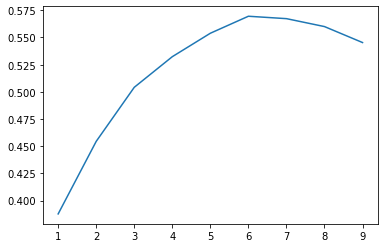

In [68]:
plt.plot(list(param_select.keys()), list(param_select.values()) )

In [69]:
# running model by using the best maximum depth parameter = 4
best_param = 6
model = DecisionTreeRegressor(max_depth=best_param)
model.fit(xtrain, ytrain)
ypred_val = model.predict(xval)
print(r2_score(yval['score'].values, ypred_val))

0.571280599553039


Feature: 0, Score: 0.54301
Feature: 1, Score: 0.03069
Feature: 2, Score: 0.08714
Feature: 3, Score: 0.08697
Feature: 4, Score: 0.06344
Feature: 5, Score: 0.03880
Feature: 6, Score: 0.00520
Feature: 7, Score: 0.01552
Feature: 8, Score: 0.00355
Feature: 9, Score: 0.00601
Feature: 10, Score: 0.00194
Feature: 11, Score: 0.00882
Feature: 12, Score: 0.00810
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00621
Feature: 15, Score: 0.00833
Feature: 16, Score: 0.00129
Feature: 17, Score: 0.00099
Feature: 18, Score: 0.00166
Feature: 19, Score: 0.00456
Feature: 20, Score: 0.00155
Feature: 21, Score: 0.00537
Feature: 22, Score: 0.01270
Feature: 23, Score: 0.00564
Feature: 24, Score: 0.00663
Feature: 25, Score: 0.00353
Feature: 26, Score: 0.00357
Feature: 27, Score: 0.03876


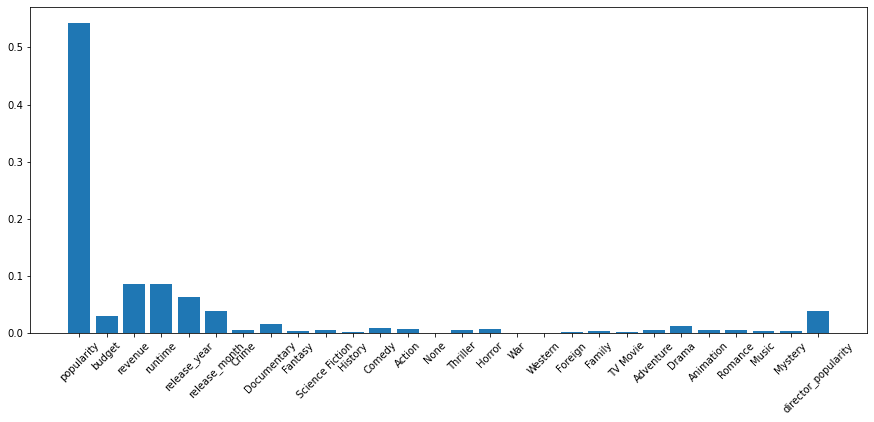

In [85]:
# finding the important features using feature importance
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,6))
plt.bar([x for x in xtrain.columns], importance)
plt.xticks(rotation=45) 
plt.show()

### Random Forest Regression to predict the score

In [71]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators= 100, random_state= 42)
RFReg.fit(xtrain, ytrain)

C:\Users\muham\AppData\Local\Temp/ipykernel_12464/2718854054.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFReg.fit(xtrain, ytrain)


RandomForestRegressor(random_state=42)

In [72]:
RFReg_ypred = RFReg.predict(xval)
RFReg_ypred

array([5.60052499, 4.69712083, 5.23774844, ..., 4.96957056, 4.31525755,
       4.89078534])

In [73]:
r2_score(yval['score'].values, RFReg_ypred)

0.6108549227423048

In [74]:
max_depth_grid = np.arange(start=100, stop=500, step=50)

param_select = {}
for step in max_depth_grid:
    model = RandomForestRegressor(n_estimators= step, random_state= 42)
    model.fit(xtrain, ytrain)
    ypred_val = model.predict(xval)
    param_select[step] = r2_score(yval['score'].values, ypred_val)
param_select
    

C:\Users\muham\AppData\Local\Temp/ipykernel_12464/1441054340.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)
C:\Users\muham\AppData\Local\Temp/ipykernel_12464/1441054340.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)
C:\Users\muham\AppData\Local\Temp/ipykernel_12464/1441054340.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)
C:\Users\muham\AppData\Local\Temp/ipykernel_12464/1441054340.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


{100: 0.6108549227423048,
 150: 0.6130086602717071,
 200: 0.6129106028110025,
 250: 0.6137146812345295,
 300: 0.6141784337275906,
 350: 0.6151000487680045,
 400: 0.6147724218363511,
 450: 0.6143783269484804}

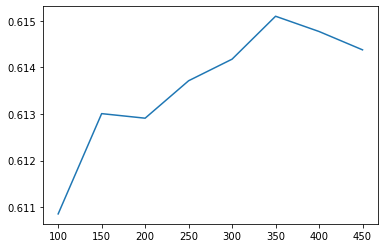

In [76]:
plt.plot(list(param_select.keys()), list(param_select.values()) )

In [77]:
# running model by using the best maximum depth parameter = 4
best_param = 350
model = RandomForestRegressor(n_estimators= best_param, random_state= 42)
model.fit(xtrain, ytrain)
ypred_val = model.predict(xval)
print(r2_score(yval['score'].values, ypred_val))

C:\Users\muham\AppData\Local\Temp/ipykernel_12464/3475011085.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


0.6151000487680045


Feature: 0, Score: 0.54301
Feature: 1, Score: 0.03069
Feature: 2, Score: 0.08714
Feature: 3, Score: 0.08697
Feature: 4, Score: 0.06344
Feature: 5, Score: 0.03880
Feature: 6, Score: 0.00520
Feature: 7, Score: 0.01552
Feature: 8, Score: 0.00355
Feature: 9, Score: 0.00601
Feature: 10, Score: 0.00194
Feature: 11, Score: 0.00882
Feature: 12, Score: 0.00810
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00621
Feature: 15, Score: 0.00833
Feature: 16, Score: 0.00129
Feature: 17, Score: 0.00099
Feature: 18, Score: 0.00166
Feature: 19, Score: 0.00456
Feature: 20, Score: 0.00155
Feature: 21, Score: 0.00537
Feature: 22, Score: 0.01270
Feature: 23, Score: 0.00564
Feature: 24, Score: 0.00663
Feature: 25, Score: 0.00353
Feature: 26, Score: 0.00357
Feature: 27, Score: 0.03876


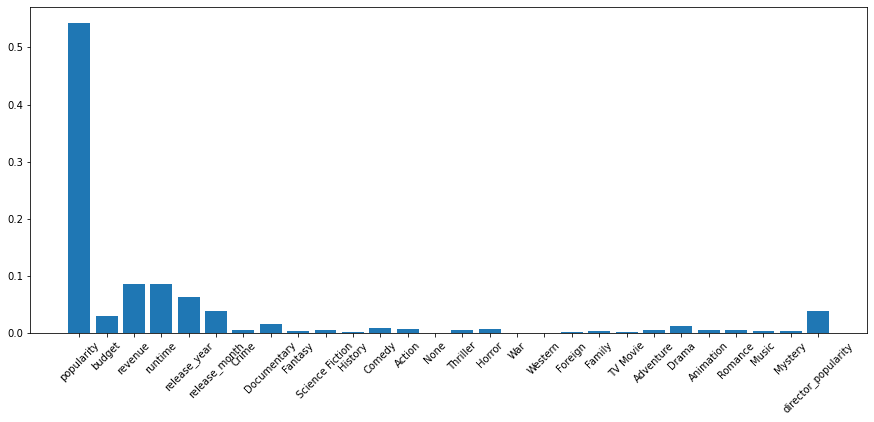

In [84]:
# finding the important features using feature importance
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,6))
plt.bar([x for x in xtrain.columns], importance)
plt.xticks(rotation=45) 
plt.show()

### Research Question 5  (How does Runtime and Budget affect Profit)?

In [87]:
import seaborn as sns

Number of columns=0 in budget: 4900
Number of columns=0 in revenue: 5161
Correlation Between Revenue And Profit :  0.5356025927832878


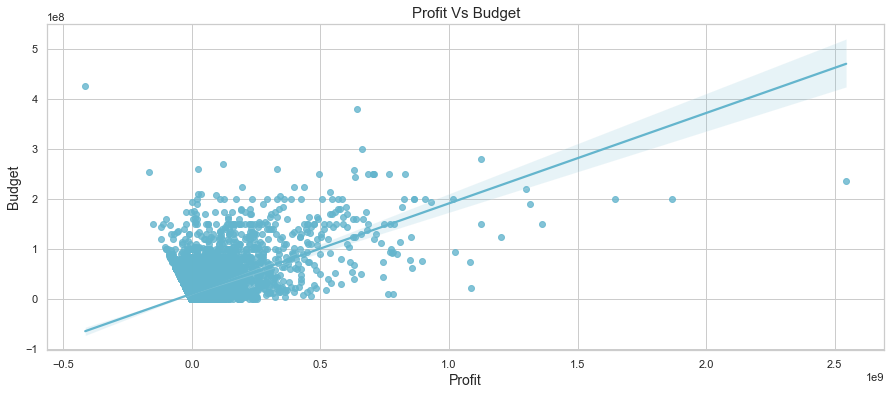

In [88]:
#checking data consistency for zero values 
print("Number of columns=0 in budget:",q_movies[(q_movies['budget']==0)].shape[0])
print("Number of columns=0 in revenue:",q_movies[(q_movies['revenue']==0)].shape[0])
#this will lead to incorrect calculation as the number of 0 is huge and doesn't make sense.
#it might mean the movie was never released or never sold, which isn't realistic. apply NAAN

#define a new column for profit
q_movies['profit'] = q_movies['revenue'] - q_movies['budget']

#scatter regplot for profit vs. budget
ax = sns.regplot(x=q_movies['profit'], y=q_movies['budget'],color='c')

#stitle and labels
ax.set_title("Profit Vs Budget",fontsize=15)
ax.set_xlabel("Profit",fontsize=14)
ax.set_ylabel("Budget",fontsize=14)
#figure size
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")

#correlation of attributes
#deal with Zero cells into NAN .
q_movies['budget'] = q_movies['budget'].replace(0,np.NAN)
q_movies['revenue'] = q_movies['revenue'].replace(0,np.NAN)
q_movies['profit'] = q_movies['profit'].replace(0,np.NAN)

#finally the correlation is ...

data_correlation = q_movies.corr()
print("Correlation Between Revenue And Profit : ",data_correlation.loc['profit','budget'])

Number of columns=0 in runtime: 24
Number of columns=0 in profit: 0
Correlation Between RunTime And Profit :  0.18359137805596415


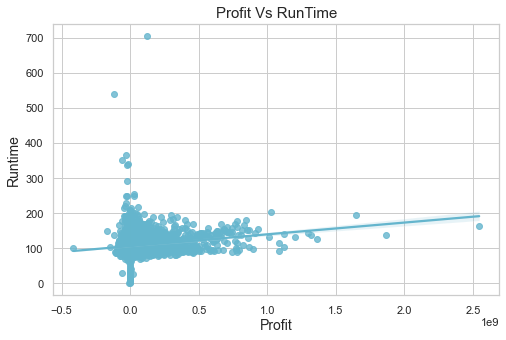

In [90]:
#checking data consistency for zero values 
print("Number of columns=0 in runtime:",q_movies[(q_movies['runtime']==0)].shape[0])
print("Number of columns=0 in profit:",q_movies[(q_movies['profit']==0)].shape[0])
#apply NAAN


#scatter regplot for profit vs. runtime
ax = sns.regplot(x=q_movies['profit'], y=q_movies['runtime'],color='c')

#stitle and labels
ax.set_title("Profit Vs RunTime",fontsize=15)
ax.set_xlabel("Profit",fontsize=14)
ax.set_ylabel("Runtime",fontsize=14)
#figure size
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")

#correlation of attributes
#deal with Zero cells into NAN .
q_movies['runtime'] = q_movies['runtime'].replace(0,np.NAN)


#find the correlation using 'corr()' function.

data_correlation = q_movies.corr()
print("Correlation Between RunTime And Profit : ",data_correlation.loc['profit','runtime'])

#### Recommend the best month to release a movie for higher Revenue/profit?

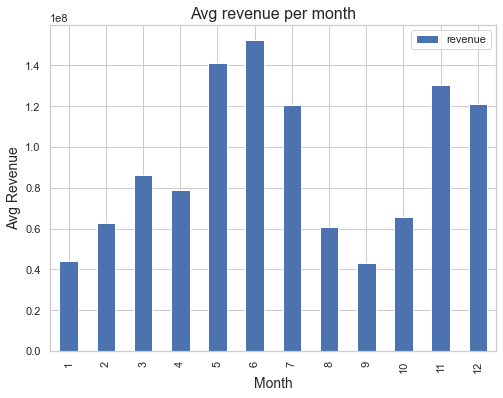

In [91]:
#extract the month number from the release date.
date =pd.to_datetime(q_movies['release_date'], errors='coerce')
month_release = pd.DataFrame(date.dt.month)

#rename new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)
#create a column 'revenue' in the new df.
month_release['revenue'] = q_movies['revenue']

#grouping data by month and calculating the corresponding revenue avg.
mean_revenue  = month_release.groupby('release_month').mean()

mean_revenue['ID']= np.arange(1,13)
mean_revenue.set_index('ID')
mean_revenue
#bar plot.
mean_revenue.plot(x='ID',kind='bar',figsize = (8,6),fontsize=11)

# title and lables
plt.title('Avg revenue per month',fontsize = 16)
plt.xlabel('Month',fontsize = 14)
plt.ylabel('Avg Revenue',fontsize = 14)
sns.set_style("whitegrid")

### Research Question 6  (What attributes result in higher revenue/profit)?

In [92]:
#defining corrrelation map as a heatmap
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 13 , 11 ) )
    cmap = sns.diverging_palette( 250 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .8 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 13 })

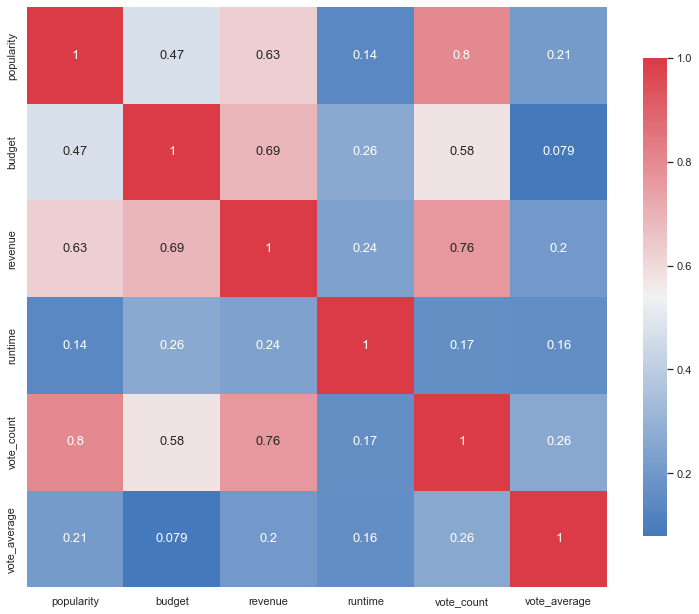

In [93]:
plot_correlation_map(q_movies[['popularity','budget','revenue','runtime','vote_count','vote_average']])

<a id='conclusions'></a>
## Conclusions

The questions answered in the report provided the top 10 movies in all time some of which matches the real top 10 movies on Imdb page.

The second question answered is actually more interesting than the first one. I analyzed the data to find the most popular genres across the whole dataset. The problem was that most of the movies contained more than one genre. I used string cutting to seperate the different genres and analyze all. The findings was fascinating. The results showed that Drama is the most popular genre of all time. That means that a movie will have a higher popularity to be sold if it had the genre Drama in it.

### Limitations
One of the limitations in the second questions was the necessaty to seperate the genres tag into more genres. this showed alot of effort to make it correctly, but eventually I got it right. 

In [89]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1